normalisation des images

In [2]:
import os
import cv2

# Chemin du dossier contenant les images à normaliser
input_dir = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\images"

# Chemin du dossier de sortie pour les images normalisées
output_dir = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées"

# Dimensions cibles pour les images normalisées
target_size = (512, 512)

# Itération sur les fichiers dans le dossier d'entrée
for filename in os.listdir(input_dir):
    print("Traitement de l'image", filename)
    # Charger l'image avec OpenCV
    img = cv2.imread(os.path.join(input_dir, filename))

    # Normaliser la taille de l'image
    img = cv2.resize(img, target_size)

    # Convertir les couleurs en float entre 0 et 1
    img = img.astype('float32') / 255.0

    # Enregistrer l'image normalisée dans le dossier de sortie
    output_path = os.path.join(output_dir, filename)
    try:
        _, buffer = cv2.imencode('.jpg',img)
        buffer.tofile(output_path)
        print("Image traitée avec succès et enregistrée sous", output_path)
    except cv2.error as e:
        print(f"Erreur lors de l'enregistrement de l'image {filename} :", e)


Traitement de l'image IMG_20230514_142252.jpg
Image traitée avec succès et enregistrée sous C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées\IMG_20230514_142252.jpg
Traitement de l'image IMG_20230514_142330.jpg
Image traitée avec succès et enregistrée sous C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées\IMG_20230514_142330.jpg
Traitement de l'image IMG_20230514_142359.jpg
Image traitée avec succès et enregistrée sous C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées\IMG_20230514_142359.jpg
Traitement de l'image IMG_20230514_142414.jpg
Image traitée avec succès et enregistrée sous C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées\IMG_20230514_142414.jpg
Traitement de l'image IMG_20230514_142434.jpg
Image traitée avec succès et enregistrée sous C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées\IMG_20230514_142434.jpg
Traitement de l'image IMG_20230514_142447.jpg
Image traitée avec succès et enregistrée sous C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées\IMG_20230514_142

Création des labels

In [3]:
import os


# Chemin du dossier contenant les sous-dossiers de figures
dossier_figures = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\figures"

# Chemin du fichier de sortie
chemin_fichier_sortie = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\labels_figures.txt"

# Ouvrir le fichier de sortie en mode écriture
fichier_sortie = open(chemin_fichier_sortie, 'w')

# Parcourir tous les sous-dossiers
for nom_sous_dossier in os.listdir(dossier_figures):
    chemin_sous_dossier = os.path.join(dossier_figures, nom_sous_dossier)
    # Vérifier si l'élément est un dossier
    if os.path.isdir(chemin_sous_dossier):
        # Parcourir toutes les images dans le sous-dossier
        for nom_image in os.listdir(chemin_sous_dossier):
            chemin_image = os.path.join(chemin_sous_dossier, nom_image)
            # Écrire le nom de l'image et le label dans le fichier de sortie
            ligne = f"{nom_image},{nom_sous_dossier}\n"
            fichier_sortie.write(ligne)

# Fermer le fichier de sortie
fichier_sortie.close()

print("Création du fichier de labels terminée.")


Création du fichier de labels terminée.


Descriteur hog

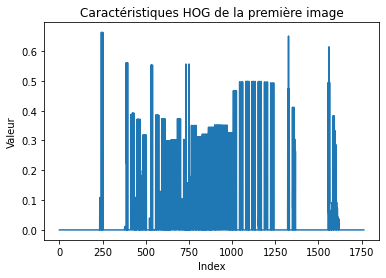

In [4]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Chemin du dossier contenant les images normalisées
dossier_images = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées"

# Paramètres du descripteur HOG
win_size = (512, 512)  # Taille de la fenêtre pour le calcul des gradients
block_size = (128,128)  # Taille du bloc pour la normalisation des gradients
block_stride = (64,64)  # Pas du bloc
cell_size = (64, 64)  # Taille de la cellule pour le calcul des gradients
num_bins = 9  # Nombre de bins dans l'histogramme

# Créer un objet HOG avec les paramètres spécifiés
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Liste pour stocker les vecteurs de caractéristiques HOG
vecteurs_caracteristiques = []

# Parcourir toutes les images dans le dossier
for nom_image in os.listdir(dossier_images):
    chemin_image = os.path.join(dossier_images, nom_image)
    # Charger l'image avec Pillow
    image = Image.open(chemin_image)


    
    # Calculer les caractéristiques HOG pour l'image
    vecteur_caracteristique = hog.compute(np.array(image))
    # Ajouter le vecteur de caractéristiques à la liste
    vecteurs_caracteristiques.append(vecteur_caracteristique.flatten())

# Convertir la liste de vecteurs de caractéristiques en un tableau numpy
vecteurs_caracteristiques = np.array(vecteurs_caracteristiques)



# Obtenir les indices des éléments non nuls
indices_non_nuls = np.nonzero(vecteurs_caracteristiques[0])

# Accéder aux valeurs non nulles du vecteur de caractéristiques
valeurs_non_nulles = vecteurs_caracteristiques[0][indices_non_nuls]

# Afficher les valeurs non nulles
#print(valeurs_non_nulles)


# Afficher la taille du tableau de caractéristiques
#print("Taille du tableau de caractéristiques HOG :", vecteurs_caracteristiques.shape)

# Sélectionner le premier vecteur de caractéristiques
vecteur_caracteristique = vecteurs_caracteristiques[70]


 #code pour visualiser l'histogramme

# Afficher les valeurs du vecteur de caractéristiques
plt.plot(vecteur_caracteristique)
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Caractéristiques HOG de la première image')
plt.show()






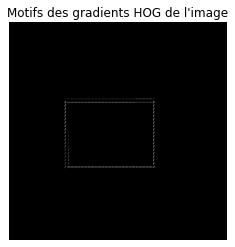

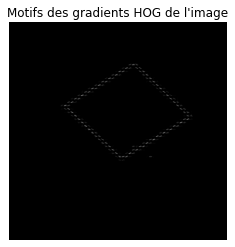

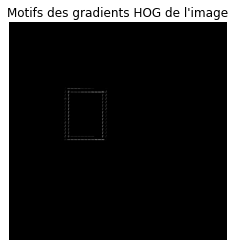

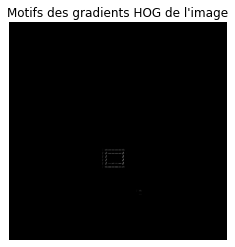

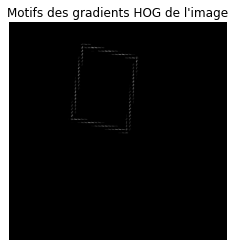

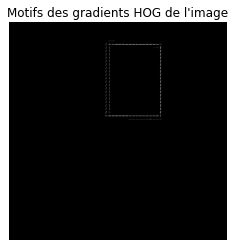

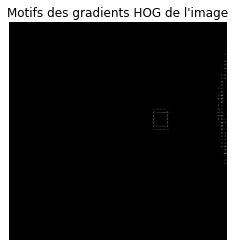

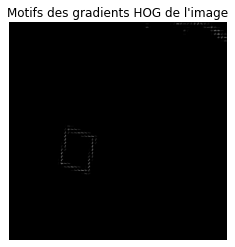

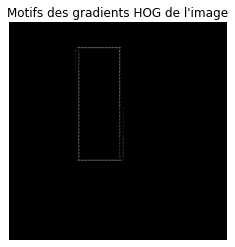

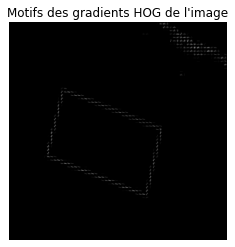

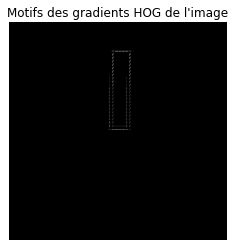

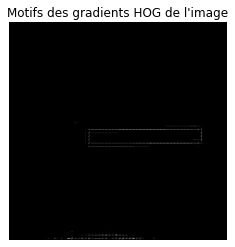

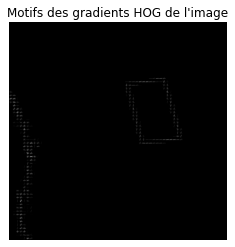

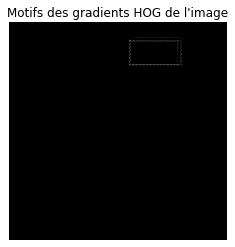

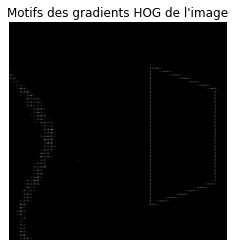

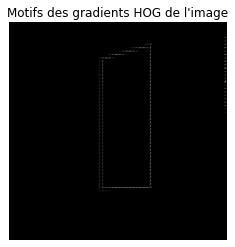

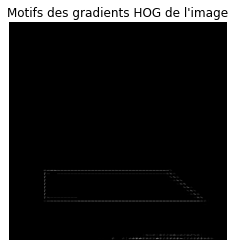

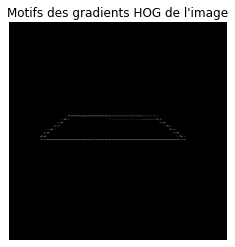

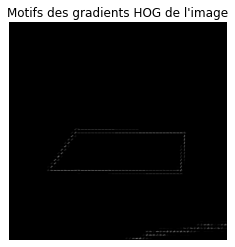

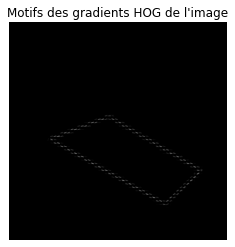

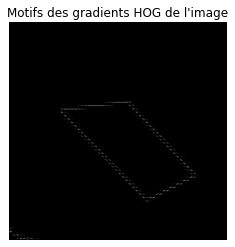

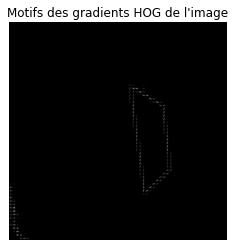

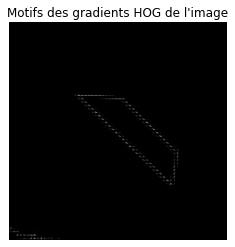

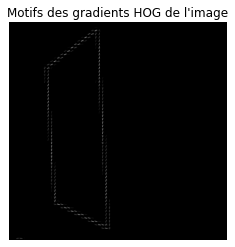

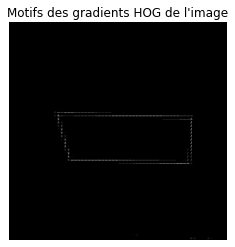

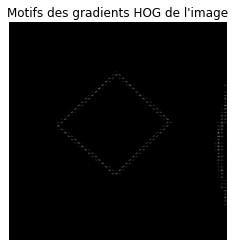

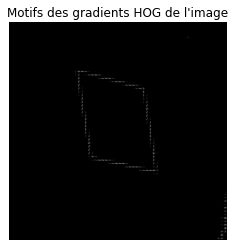

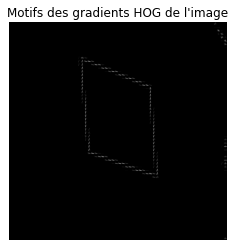

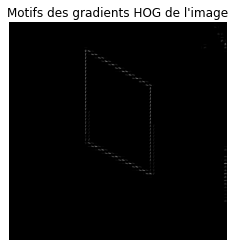

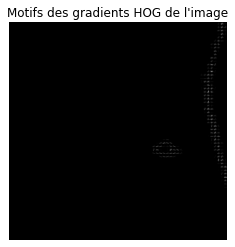

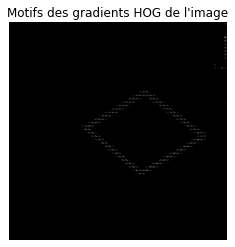

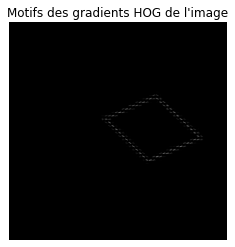

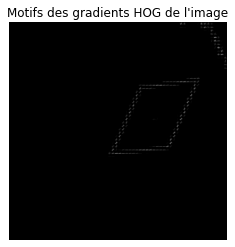

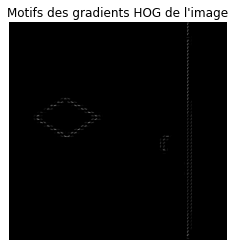

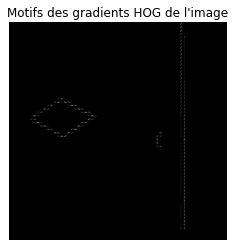

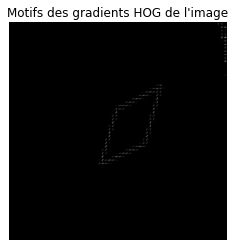

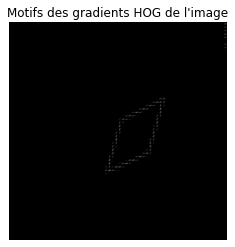

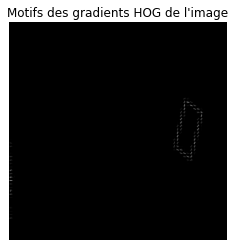

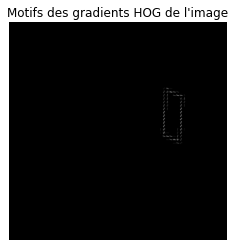

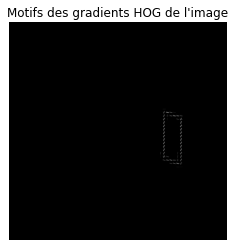

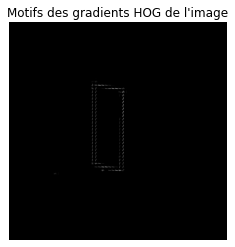

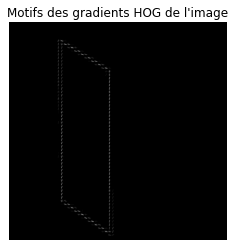

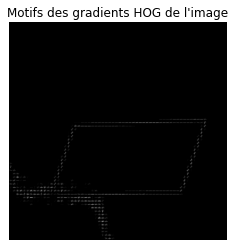

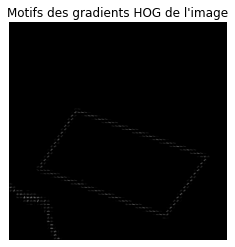

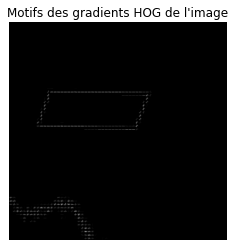

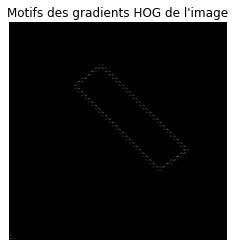

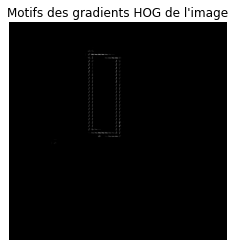

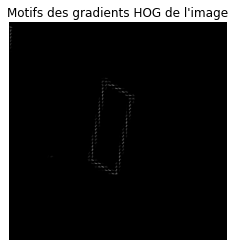

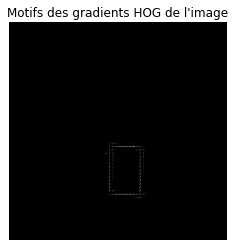

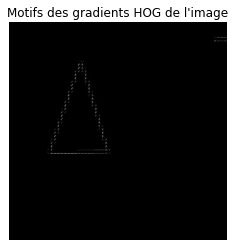

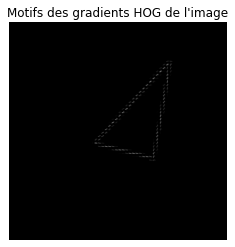

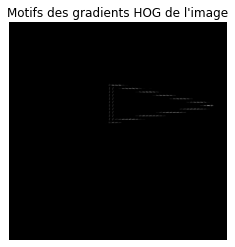

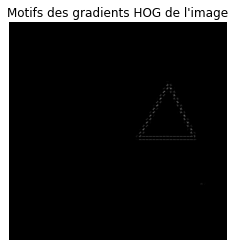

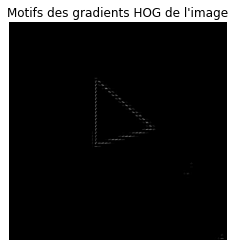

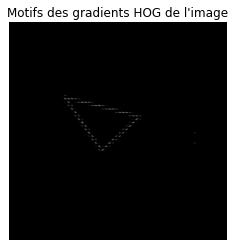

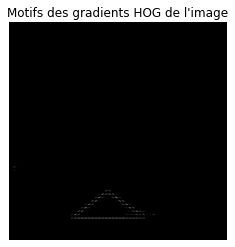

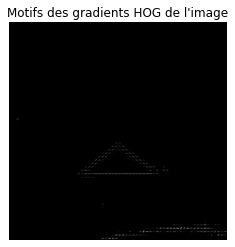

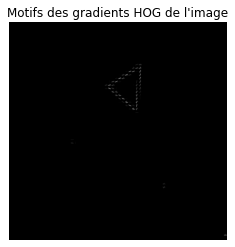

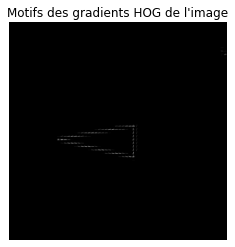

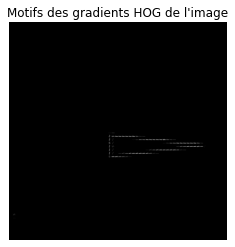

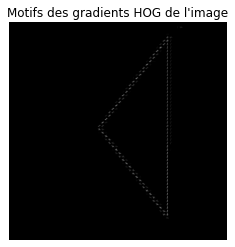

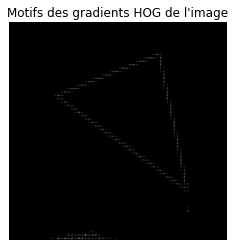

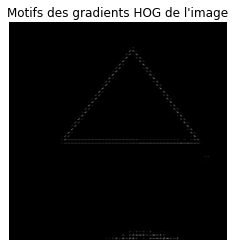

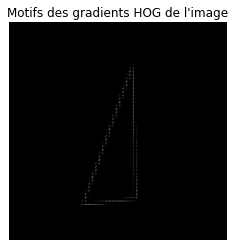

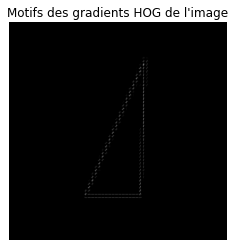

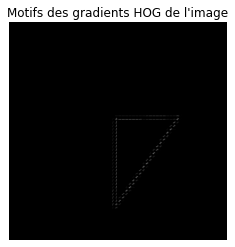

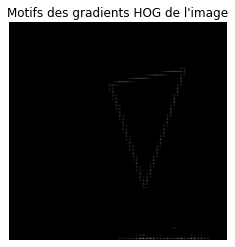

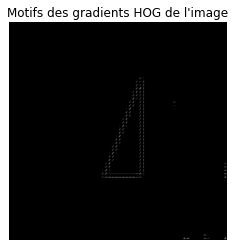

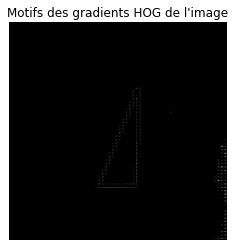

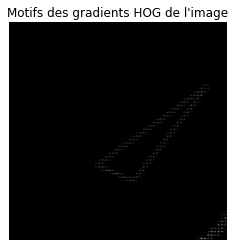

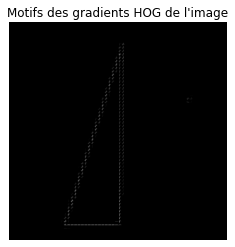

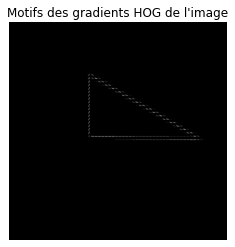

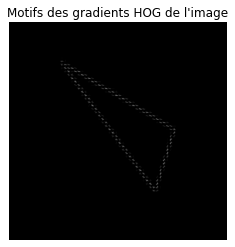

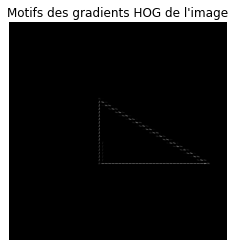

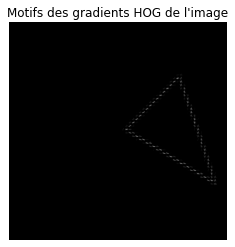

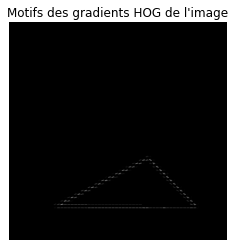

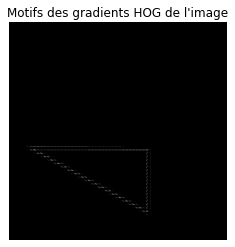

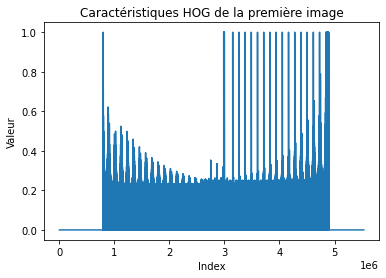

In [5]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color


# Chemin du dossier contenant les images normalisées
dossier_images = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\images_normalisées"

# Paramètres du descripteur HOG
win_size = (512, 512)  # Taille de la fenêtre pour le calcul des gradients
block_size = (128, 128)  # Taille du bloc pour la normalisation des gradients
block_stride = (128, 128)  # Pas du bloc
cell_size = (8, 8)  # Taille de la cellule pour le calcul des gradients
num_bins = 9  # Nombre de bins dans l'histogramme

# Liste pour stocker les vecteurs de caractéristiques HOG
vecteurs_caracteristiques = []

# Parcourir toutes les images dans le dossier
for nom_image in os.listdir(dossier_images):
    chemin_image = os.path.join(dossier_images, nom_image)
    # Charger l'image avec Pillow
    image = Image.open(chemin_image)

    # Convertir l'image en niveaux de gris
    image_gris = color.rgb2gray(np.array(image))

    # Calculer les caractéristiques HOG pour l'image en niveaux de gris
    vecteur_caracteristique, hog_image = hog(image_gris, orientations=num_bins, pixels_per_cell=cell_size,
                                             cells_per_block=tuple(b // c for b, c in zip(block_size, cell_size)),
                                             block_norm='L2-Hys', visualize=True, transform_sqrt=True)
    # Ajouter le vecteur de caractéristiques à la liste
    vecteurs_caracteristiques.append(vecteur_caracteristique)

    # Afficher l'image des motifs de gradients
    plt.imshow(hog_image, cmap='gray')
    plt.axis('off')
    plt.title('Motifs des gradients HOG de l\'image')
    plt.show()

# Convertir la liste de vecteurs de caractéristiques en un tableau numpy
vecteurs_caracteristiques = np.array(vecteurs_caracteristiques)

# Sélectionner le premier vecteur de caractéristiques
vecteur_caracteristique = vecteurs_caracteristiques[0]

# Afficher l'histogramme des caractéristiques HOG
plt.plot(vecteur_caracteristique)
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Caractéristiques HOG de la première image')
plt.show()


Division des données en ensemble de test et d'entraînement 

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Chemin du fichier contenant les labels
chemin_labels = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\labels_figures.txt"

# Lire le fichier en tant que DataFrame
df_labels = pd.read_csv(chemin_labels, sep=',', header=None, encoding='latin-1')

# Extraire les étiquettes
etiquettes = np.array(df_labels.iloc[:, 1])

# Afficher les noms d'image et les étiquettes
#print(noms_images)
#print(etiquettes)


# Diviser les vecteurs caractéristiques en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(vecteurs_caracteristiques,etiquettes, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape, Y_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape, Y_test.shape)




Dimensions de l'ensemble d'entraînement : (61, 5531904) (61,)
Dimensions de l'ensemble de test : (16, 5531904) (16,)


classifieurs

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



# Créer des instances des classifieurs
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()
lr_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()

# Entraîner les classifieurs sur l'ensemble d'entraînement
svm_classifier.fit(X_train, Y_train)
rf_classifier.fit(X_train, Y_train)



# Faire des prédictions sur l'ensemble de test
svm_predictions = svm_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)




In [26]:
from sklearn.neighbors import KNeighborsClassifier



# Entraîner les classifieurs sur l'ensemble d'entraînement
knn_classifier.fit(X_train, Y_train)



# Faire des prédictions sur l'ensemble de test
knn_predictions = knn_classifier.predict(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression

# Entraîner les classifieurs sur l'ensemble d'entraînement
lr_classifier.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
lr_predictions = lr_classifier.predict(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Entraîner les classifieurs sur l'ensemble d'entraînement
nb_classifier.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test

nb_predictions = nb_classifier.predict(X_test)


COMPARAISON DES CLASSIFIEURS

In [30]:



# Comparaison des prédictions avec les étiquettes réelles
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print("Précision du classifieur SVM :", svm_accuracy)

rf_accuracy = accuracy_score(Y_test, rf_predictions)
print("Précision du classifieur Random Forest :", rf_accuracy)


#lr_accuracy = accuracy_score(Y_test, lr_predictions)
#print("Précision du classifieur Logistic Regression :", lr_accuracy)

knn_accuracy = accuracy_score(Y_test, knn_predictions)
print("Précision du classifieur K-Nearest Neighbors :", knn_accuracy)

#nb_accuracy = accuracy_score(Y_test, nb_predictions)
#print("Précision du classifieur GaussianNB:",nb_accuracy)


#un nombre entre 0 et 1, où 1 représente une précision de 100% et 0 représente une précision de 0%

Précision du classifieur SVM : 0.375
Précision du classifieur Random Forest : 0.3125
Précision du classifieur K-Nearest Neighbors : 0.1875
